In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [273]:
#Importing and reading csv file
df=pd.read_csv("/Users/pawanpanchal/Downloads/zomato.csv")

# Exploring Datas

In [274]:
#Viewing top 5 values of dataframe
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Shape of dataframe

In [275]:
# Shape of dataframe
df.shape     # we are looking 51717 raws and 17 columns avilable in dataframe. Now we can analyze columns.


(51717, 17)

In [276]:
df.columns   

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Statstics

In [277]:
#Statstics
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [278]:
#info regarding dataframe
df.info()     # in this dataframe 1 numerical and 16 categorical columns available

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [279]:
#Let's find null value
df.isnull().sum()   

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Observations
- we can observe "dish_linked"has lot of null values so we can drop null values.
- in "rate " column we can fill null values.
- "rate" column in string format so need to convert into float .
- "phone" column not worth so we can drop
- "location" & "listed_in(city)" are same so we can drop one column

# Drop Unwanted Columns

In [280]:
#Let'S drop unwanted column first 
df=df.drop(["location","phone","menu_item"],axis=1)

In [281]:
df.info(2) # Dropped 3 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   rest_type                    51490 non-null  object
 8   dish_liked                   23639 non-null  object
 9   cuisines                     51672 non-null  object
 10  approx_cost(for two people)  51371 non-null  object
 11  reviews_list                 51717 non-null  object
 12  listed_in(type)              51717 non-null  object
 13  listed_in(city)              51

In [282]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Shape Of Dataframe

In [283]:
#Now shape of dataframe
df.shape

(51717, 14)

In [284]:
# now start cleaning ---->

# Explore "rate" column
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

===> we are looking lot of changes required.  need to clean/replace("nan","New","-",/5)

# Removal of  "NEW","-" and "/5" from rate column through function

In [285]:
#Removal of  "NEW","-" and "/5" from rate column through function
def handle_rate(value):
    if (value =="NEW" or value=="-"):
         return np.nan
    else:
        value=str(value).split("/")
        value=value[0]
        return float (value)
    

In [286]:
df["rate"]=df["rate"].apply(handle_rate)

In [287]:
df["rate"].head()  

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [288]:
#Now handle null values ====> Filling null values with mean of rate column
df["rate"].fillna(df["rate"].mean(),inplace=True)

In [289]:
# Let's check null values in rate column
df["rate"].isnull().sum()      #0 null value in rate column.Almost done!

0

In [290]:
# Explore "listed_in(city) " column.
df["listed_in(city)"].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [291]:
#No. of orders according cities
df["listed_in(city)"].value_counts()  #Here are so many locations value. So we will consider top 15 locations

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: listed_in(city), dtype: int64

In [292]:
#Top 15 locations
df["listed_in(city)"].value_counts()[:15]

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Name: listed_in(city), dtype: int64

In [293]:
# Now we start work on "approx_cost(for two people)" . we will rename but wait.........!
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

===> Ahhhhh......! Lot of values seperated with comma .Now we need to start cleaning .

In [294]:
# Let's start cleaning work for "approx_cost(for two people)"
def handle_comma(value):
    value=str(value)
    if ',' in value:
        value= value.replace(',','')
        return float(value)
    else:
        return float (value)
        

In [295]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].apply(handle_comma)

In [296]:
df["approx_cost(for two people)"].unique() #Removed comma with help of function"handle_comma"

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [297]:
# Now time to rename column 
df1=df.rename(columns={"approx_cost(for two people)":"Cost","listed_in(city)":"City","listed_in(type)":"Type"})   #Now we can check our new column name

In [298]:
df1.head()

,url,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,Cost,reviews_list,Type,City
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [299]:
# Now time to clean "rest_type" column
df["rest_type"].unique()      #Ahhhhh......!

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [300]:
df["rest_type"].value_counts()          # from here we can observe some restaurents have lot of orders and some few.

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [301]:
Rest=df["rest_type"].value_counts(ascending=False)       #Stored in a variable

In [302]:
Rest

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [303]:
rest_above_1000=Rest[Rest>1000]

In [304]:
rest_above_1000    #Filterd above 1000 orderd restaurents.So we will consider only these restaurents.

Quick Bites           19132
Casual Dining         10330
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Name: rest_type, dtype: int64

In [305]:
rest_below_1000=Rest[Rest<1000]

In [306]:
rest_below_1000

Beverage Shop                 867
Bar                           697
Food Court                    624
Sweet Shop                    468
Bar, Casual Dining            425
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: rest_type, Length: 85, dtype: int64

In [307]:
#Now you are thinking what will do below 1000 order restaurents. Relaxxxxxx...................!
#We will consider them in others category.

def handle_rest(value):

    if (value in rest_below_1000):
        return"Others"
    else:
        return value

In [308]:
df['rest_type']=df['rest_type'].apply(handle_rest)

In [309]:
#Almost cleaning done...........
df["rest_type"].value_counts()

Quick Bites           19132
Casual Dining         10330
Others                 9097
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Name: rest_type, dtype: int64

In [310]:
df1.head(3)    #viewing now below 1000 considering as others

,url,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,Cost,reviews_list,Type,City
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari


In [311]:
# Let's start cleaning for "City"
df1["City"].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [312]:
df1["City"].value_counts() #Cities column almost cleand so no need for cleaning.

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: City, dtype: int64

In [313]:
#Now time to clean for "Cuisines " column
df1["cuisines"].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [314]:
df1["cuisines"].value_counts()   #Here viewing lot of cuisines less than 10.........oppps. Let's clean

North Indian                                   2913
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: cuisines, Length: 2723, dtype: int64

In [315]:
Cuisines=df1["cuisines"].value_counts(ascending=False)

In [316]:
Cuisines_below100=Cuisines[Cuisines<100]

In [317]:
Cuisines_below100         #Lot of cuisines less than 100. Again we will consider these in Others category

North Indian, Continental, Chinese             97
Juices                                         94
Fast Food, North Indian                        93
Bengali, North Indian                          93
Beverages, Juices                              90
                                               ..
North Indian, Chinese, South Indian, Juices     1
North Indian, Chinese, Kebab, Mughlai           1
Chinese, Vietnamese, Thai, Malaysian            1
Arabian, Lebanese, Chinese, Rolls               1
North Indian, Chinese, Arabian, Momos           1
Name: cuisines, Length: 2654, dtype: int64

In [318]:
def handle_cuisines(value):
    if (value in Cuisines_below100):
        return "Others"
    else:
        return value

In [319]:
df1["cuisines"]=df1["cuisines"].apply(handle_cuisines)

In [320]:
df1["cuisines"].value_counts()   #Here we are viewing untill 100 . Below 100 will be consider oin others

Others                                 26460
North Indian                            2913
North Indian, Chinese                   2385
South Indian                            1828
Biryani                                  918
                                       ...  
South Indian, Chinese, North Indian      105
Italian, Pizza                           105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [321]:
df1.head()     #["cuisines"] also almost done.

,url,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,Cost,reviews_list,Type,City
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",Others,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...",Others,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe",Others,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [322]:
# Start work on "Type"
df1["Type"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [323]:
df1["Type"].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: Type, dtype: int64

Cleaning part almost done

# Exploratry Data Analysis & Visualization

How many chains and outlets in dataframe

In [324]:

outlets=df1["name"].value_counts()

In [325]:
outlets  #Viewing outlets

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Natis                                                       1
Shreyas                                                     1
Vishwas Kabab Centre                                        1
Taj Biryani Centre                                          1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8792, dtype: int64

In [326]:
chains=outlets[outlets>=2]    

In [327]:
chains #We can observe restaurant chains . 

Cafe Coffee Day                     96
Onesta                              85
Just Bake                           73
Empire Restaurant                   71
Five Star Chicken                   70
                                    ..
Cafe Ritzz                           2
Celeste's Kitchen                    2
Angel Mutton Leg Soup                2
Stop 'N' Joy                         2
Mylari Biryani Family Restaurant     2
Name: name, Length: 7715, dtype: int64

In [328]:
#Top 10 restaurant chains
chains.head(10)

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Chef Baker's         62
Name: name, dtype: int64

# Visualize top 10 restaurants chain

In [329]:
#Visualize top 10 restaurants chain
top10_chains=df1["name"].value_counts()[:10].sort_values(ascending=True)

Text(0.5, 1.0, 'Top 10 Restaurant chain in India (by number of outlets)')

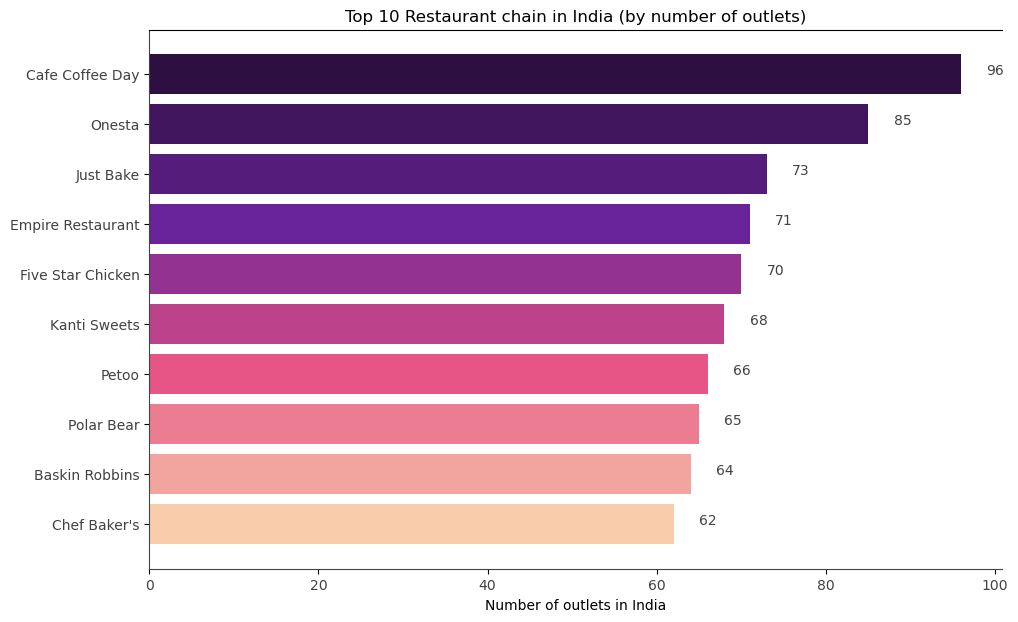

In [330]:
height=top10_chains.values
bars=top10_chains.index
y_pos = np.arange(len(bars))

fig=plt.figure(figsize=[11,7],frameon=False)
ax=fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)

plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by number of outlets)")




# Restaurant Types Visualization

In [331]:
rest_count = df1.groupby("rest_type").count()["name"].sort_values(ascending=False)[:5]

Text(0.5, 1.0, 'Number of restaurants (by Restaurant types)')

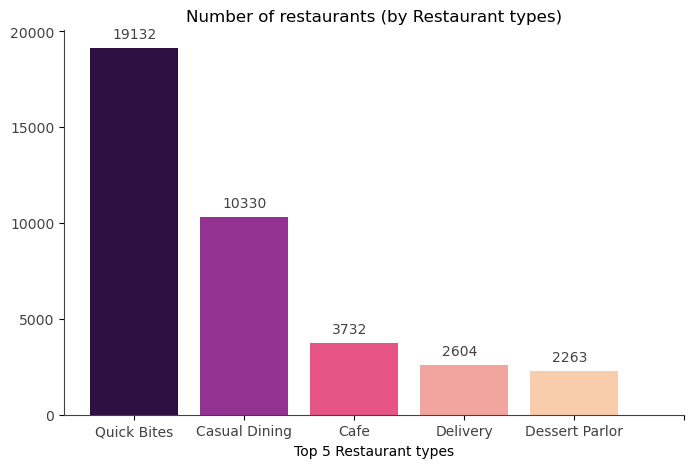

In [332]:
fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]
plt.bar(rest_count.index, rest_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 Restaurant types")

for i, v in enumerate(rest_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by Restaurant types)")


# Average Ratings & Votes

In [333]:
rating_by_rest = df1.groupby("rest_type").mean()["rate"].sort_values(ascending=False)


In [334]:
df1.describe()

,rate,votes,Cost
count,51717.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431566
std,0.395391,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.500000,7.000000,300.000000
50%,3.700449,41.000000,400.000000
75%,3.900000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


In [335]:
df1.groupby("rest_type").mean()["votes"].sort_values(ascending=False)[:10]

rest_type
Microbrewery                   6443.766667
Microbrewery, Pub              5504.452381
Lounge, Microbrewery           4653.000000
Pub, Cafe                      4472.875000
Pub, Microbrewery              4174.380952
Casual Dining, Irani Cafee     3686.600000
Casual Dining, Microbrewery    2527.237288
Fine Dining, Lounge            2236.785714
Microbrewery, Lounge           2225.777778
Cafe, Casual Dining            1952.329480
Name: votes, dtype: float64

# No.of restaurants by cities

In [336]:
city_counts = df1.groupby("City").count()["name"].sort_values(ascending=True)[-10:]

Text(0.5, 1.0, 'Number of restaurants (by city)')

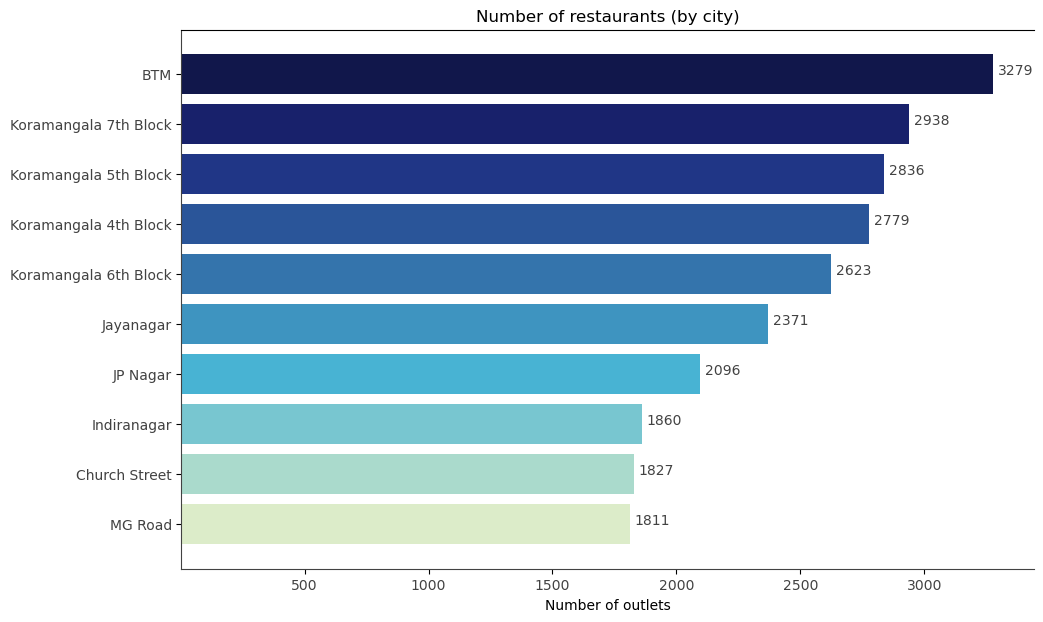

In [337]:
height = pd.Series(city_counts.values)
bars = city_counts.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b']

plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets")

for i, v in enumerate(height):
    ax.text(v + 20, i, str(v), color='#424242')
plt.title("Number of restaurants (by city)")

# No. of Restaurants by Cuisines

In [338]:
df1["cuisines"].nunique()

70

In [339]:
Total_number_of_unique_cuisines=df1["cuisines"].value_counts()[:5]

In [340]:
Total_number_of_unique_cuisines

Others                   26460
North Indian              2913
North Indian, Chinese     2385
South Indian              1828
Biryani                    918
Name: cuisines, dtype: int64

Text(0.5, 1.0, 'Number of restaurants (by cuisine type)')

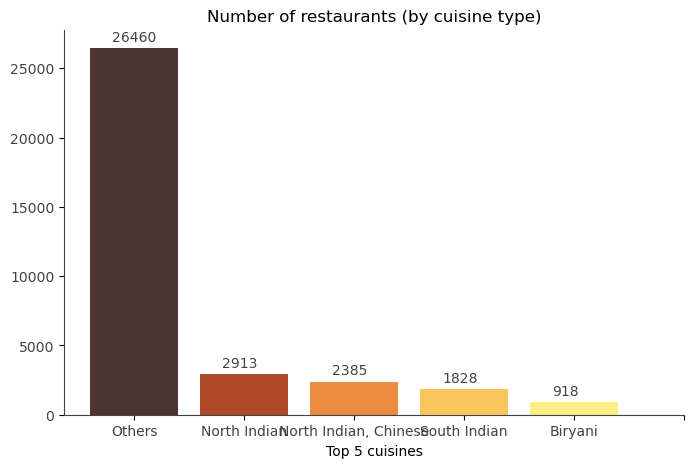

In [341]:
fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86']
plt.bar(Total_number_of_unique_cuisines.index, Total_number_of_unique_cuisines.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 30000, 5000), color="#424242")
plt.xlabel("Top 5 cuisines")

for i, v in enumerate(Total_number_of_unique_cuisines):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by cuisine type)")

# Rating Distribution

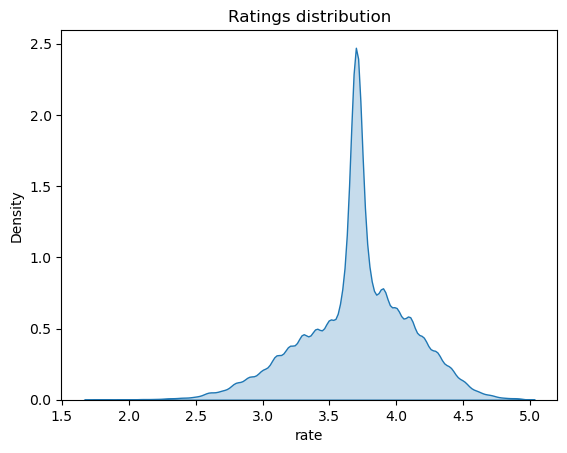

In [342]:
sns.kdeplot(df1['rate'], shade=True)
plt.title("Ratings distribution")
plt.show()

# Cost Distribution

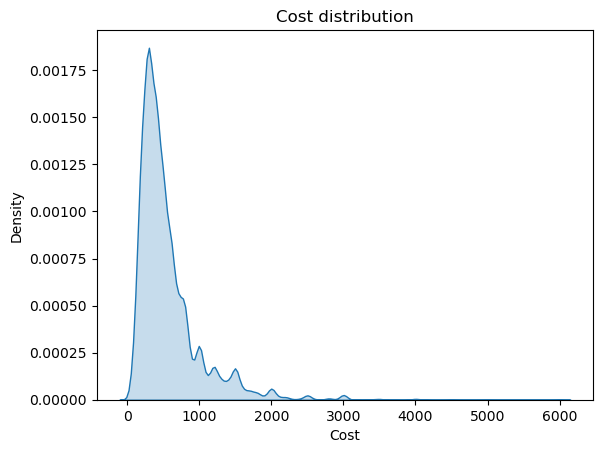

In [343]:
sns.kdeplot(df1['Cost'], shade=True)
plt.title("Cost distribution")
plt.show()

# Online order visualization

<Axes: xlabel='online_order', ylabel='count'>

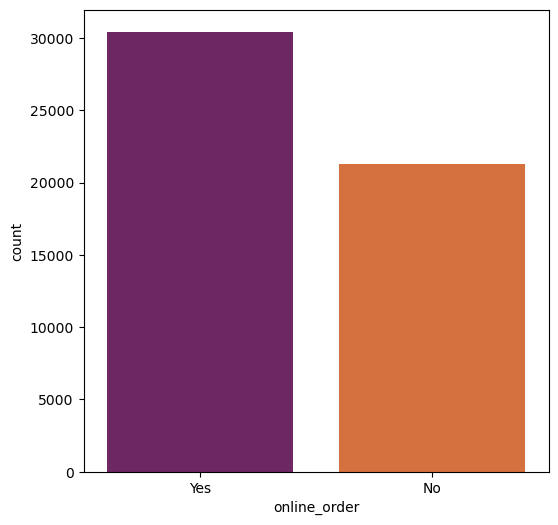

In [344]:
plt.figure(figsize = (6,6))
sns.countplot(x=df1['online_order'],data=df1, palette = 'inferno')

# Table Booking Visualization

<Axes: xlabel='book_table', ylabel='count'>

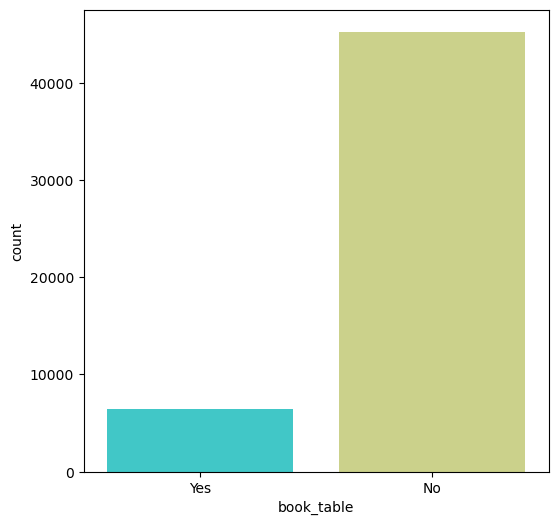

In [345]:
plt.figure(figsize = (6,6))
sns.countplot(x=df1['book_table'],data=df1, palette = 'rainbow')

# Online Order V/S Rate

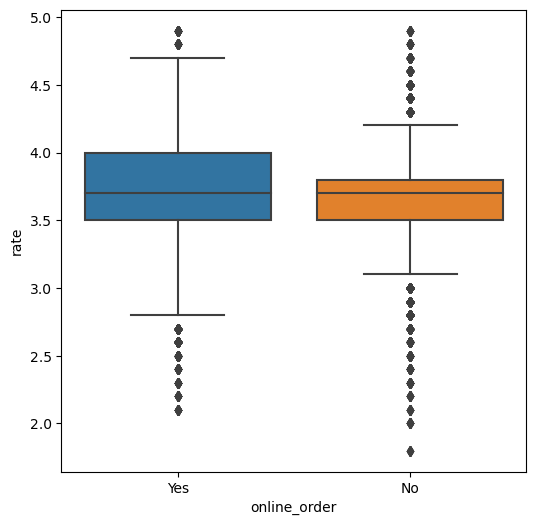

In [346]:
plt.figure(figsize = (6,6))
x=sns.boxplot(x = 'online_order', y = 'rate', data = df1)

# Table Booking V/S Rate

<Axes: xlabel='book_table', ylabel='rate'>

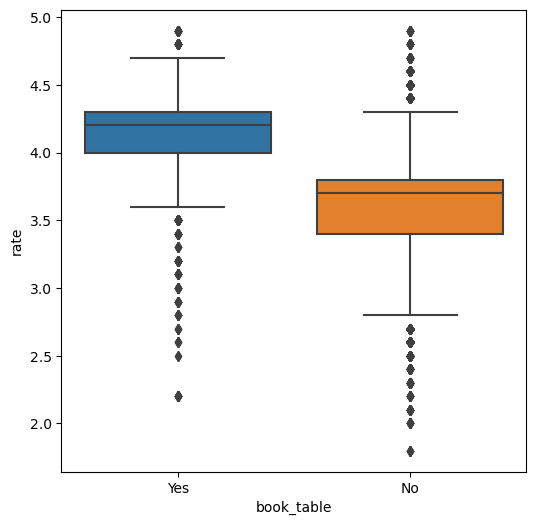

In [347]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df1)

# Restaurants V/S Rate

<Axes: xlabel='Type', ylabel='rate'>

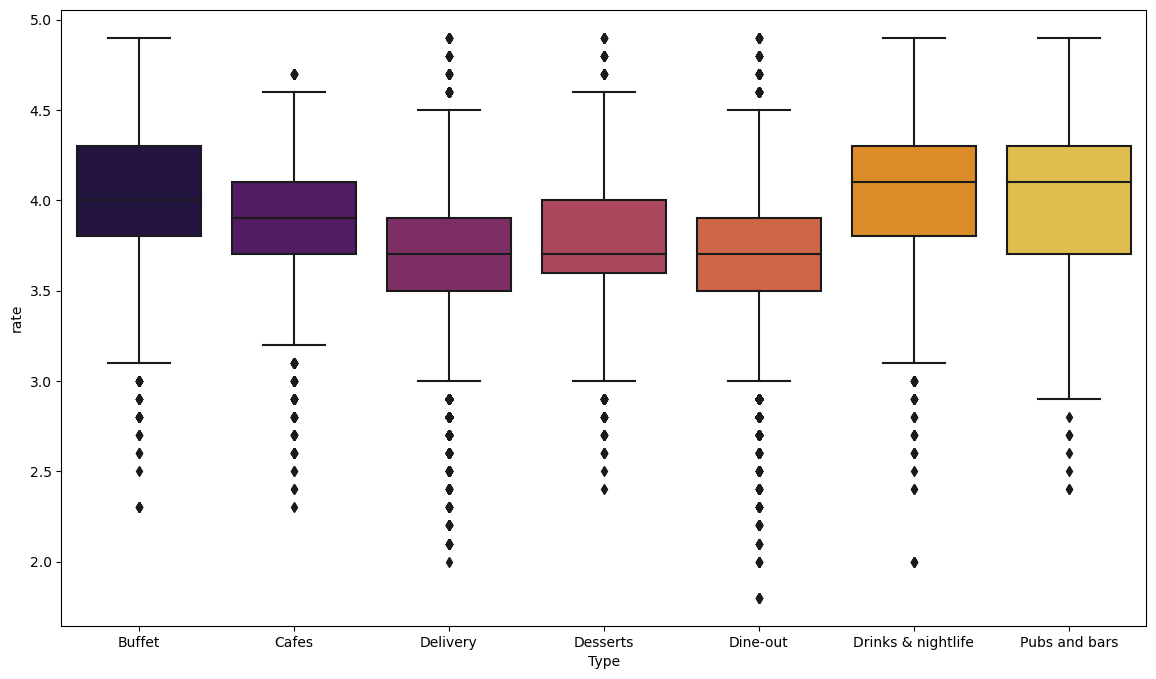

In [348]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = df1, palette = 'inferno')